In [ ]:
import Pkg
Pkg.add("CSV")
Pkg.add("StatsPlots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("CairoMakie")
Pkg.add("Plots")
Pkg.add("MultivariateStats")

In [1]:
using CSV
using DataFrames

# Load the data from EuStockMarkets.csv
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/EuStockMarkets.csv"
df = CSV.File(download(url)) |> DataFrame

# Extract the numerical values from the DataFrame
data_matrix = Matrix(df[:, 2:end])


1860×4 Matrix{Float64}:
 1628.75  1678.1  1772.8  2443.6
 1613.63  1688.5  1750.5  2460.2
 1606.51  1678.6  1718.0  2448.2
 1621.04  1684.1  1708.1  2470.4
 1618.16  1686.6  1723.1  2484.7
 1610.61  1671.6  1714.3  2466.8
 1630.75  1682.9  1734.5  2487.9
 1640.17  1703.6  1757.4  2508.4
 1635.47  1697.5  1754.0  2510.5
 1645.89  1716.3  1754.3  2497.4
 1647.84  1723.8  1759.8  2532.5
 1638.35  1730.5  1755.5  2556.8
 1629.93  1727.4  1758.1  2561.0
    ⋮                     
 5906.33  8205.5  4197.6  5910.7
 5861.19  8239.5  4177.3  5837.0
 5774.38  8139.2  4095.0  5809.7
 5718.7   8170.2  4047.9  5736.1
 5614.77  7943.2  3976.4  5632.5
 5528.12  7846.2  3968.6  5594.1
 5598.32  7952.9  4041.9  5680.4
 5460.43  7721.3  3939.5  5587.6
 5285.78  7447.9  3846.0  5432.8
 5386.94  7607.5  3945.7  5462.2
 5355.03  7552.6  3951.7  5399.5
 5473.72  7676.3  3995.0  5455.0

In [2]:
using MultivariateStats
using LinearAlgebra
using Statistics
# Normalize the dataset
data_normalized = (data_matrix .- mean(data_matrix, dims=1)) ./ std(data_matrix, dims=1)

# Fit a PCA model to the normalized dataset
pca_model = fit(PCA, transpose(data_normalized))


PCA(indim = 4, outdim = 2, principalratio = 0.9962777489686543)

Pattern matrix (unstandardized loadings):
────────────────────────
        PC1          PC2
────────────────────────
1  0.996641   0.00962261
2  0.995538  -0.0763655
3  0.970049   0.239983
4  0.983671  -0.169122
────────────────────────

Importance of components:
──────────────────────────────────────────────
                                PC1        PC2
──────────────────────────────────────────────
SS Loadings (Eigenvalues)  3.89299   0.0921185
Variance explained         0.973248  0.0230296
Cumulative variance        0.973248  0.996278
Proportion explained       0.976884  0.0231157
Cumulative proportion      0.976884  1.0
──────────────────────────────────────────────

In [9]:
prediction = predict(pca_model,transpose(data_normalized))
pca1 = prediction[1,:]
pca2 = prediction[2,:]

1860-element Vector{Float64}:
 0.2507028642962512
 0.20883284780135247
 0.17268664318744956
 0.14612498466896695
 0.15794219544850402
 0.15821280268078294
 0.1725770897692501
 0.1892270147807216
 0.1841819113774501
 0.18952447990685506
 0.17591590176698862
 0.15490274306816285
 0.1562721101805438
 ⋮
 0.714004990771179
 0.7219287120483903
 0.6380056156018091
 0.6095025112706668
 0.6024929237757585
 0.6259157991852384
 0.6624626450739555
 0.606893075487566
 0.6040710559335765
 0.701951599414337
 0.7532708969519228
 0.76535878143841

In [4]:
prediction

2×1860 Matrix{Float64}:
 1.89341   1.90771   1.94769   1.93631   …  -5.03723   -4.97879   -5.1366
 0.250703  0.208833  0.172687  0.146125      0.701952   0.753271   0.765359

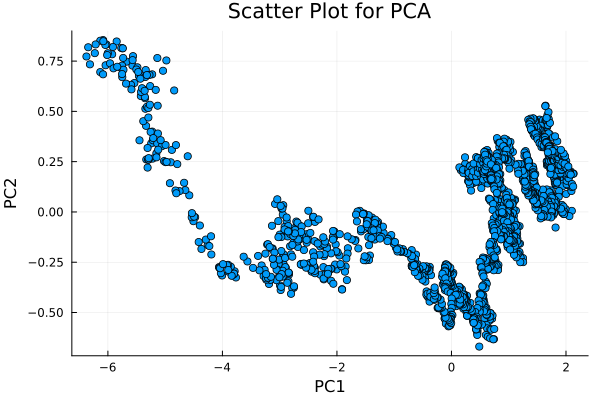

In [5]:
using Plots
scatter(pca1, pca2, xlabel="PC1", ylabel="PC2", title="Scatter Plot for PCA",legend=false)


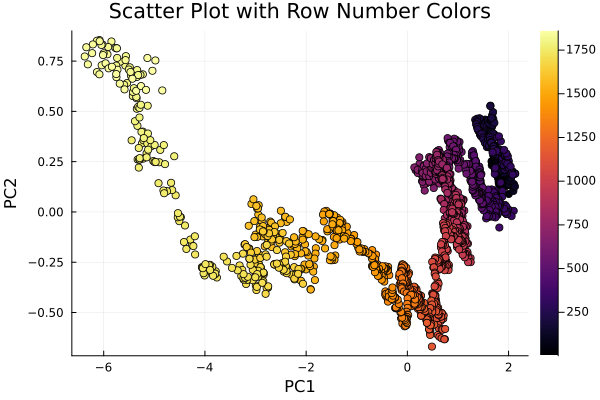

In [20]:
using Plots

# Scatter plot with row number colors
scatter(pca1, pca2, marker_z=1:size(data_normalized, 1),
        xlabel="PC1", ylabel="PC2", title="Scatter Plot with Row Number Colors", legend=false,colorbar=true,show=true)

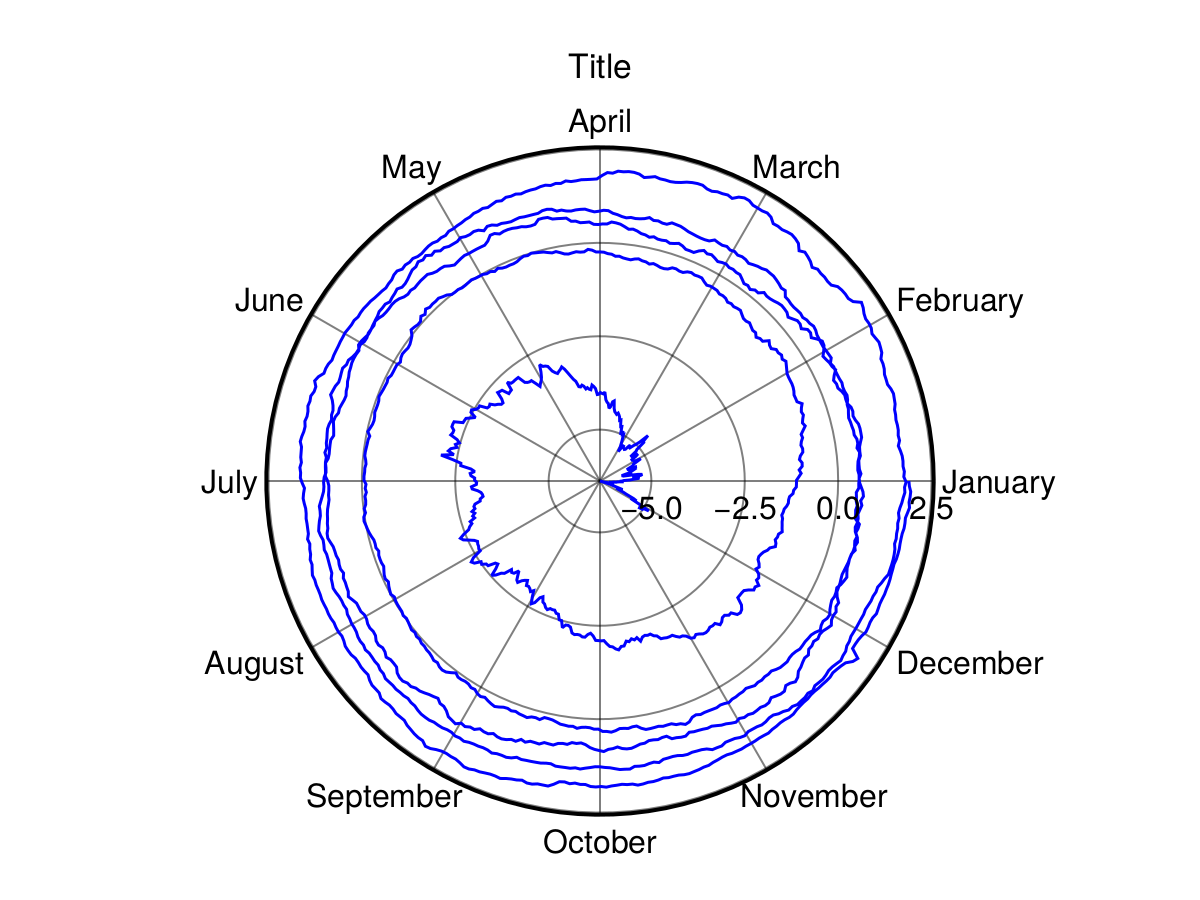

In [27]:
using CairoMakie

list_of_months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]

pca1_fig = Figure()

ax = PolarAxis(pca1_fig[1, 1], title = "Title",thetaticks =(range(0, 2pi, length = 13)[1:end-1], list_of_months))

lineobject = lines!(ax, range(0, stop=-1860/365  * 2pi, length=1860), pca1, color = :blue)
pca1_fig

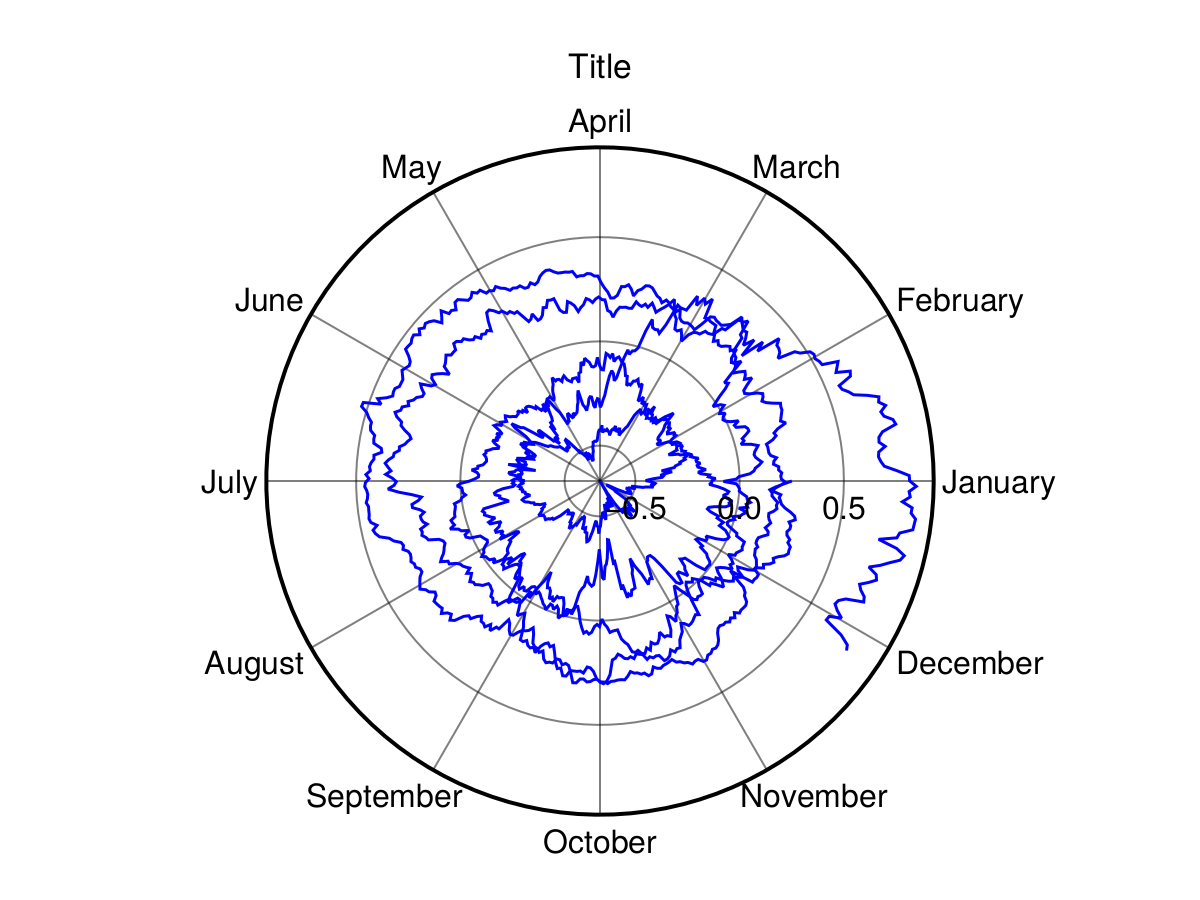

In [28]:
pca2_fig = Figure()

ax = PolarAxis(pca2_fig[1, 1], title = "Title",thetaticks =(range(0, 2pi, length = 13)[1:end-1], list_of_months))

lineobject = lines!(ax, range(0, stop=-1860/365  * 2pi, length=1860), pca2, color = :blue)
pca2_fig

# Assignment Overview

The assignment utilizes the EuStockMarkets dataset, sourced from the provided URL. The primary tasks involve loading the data, fitting a PCA model to the normalized dataset, and creating visualizations based on the PCA results.

## Loading the Data
The dataset is loaded from the provided URL using Pandas, revealing information about daily market values.

## PCA Modeling
A PCA model is fitted to the normalized dataset after standardization. This step is crucial for obtaining meaningful principal components.

## Visualizations
1. **Scatter Plot on 2 Largest Eigenvalues:** Transformed data is plotted on a scatter plot using the 2 largest eigenvalues, providing insight into the distribution of data along these principal components.

2. **Color-Coded Scatter Plot:** A scatter plot is generated where the color of each marker corresponds to the row number of the datapoint. This visualization adds an extra layer of information, potentially revealing patterns or anomalies in the data.

3. **Radial Plot of PCA Component Projections:** Projections along each PCA component are represented on separate radial (polar) plots. The circumferential labels indicate the months of the year, offering a unique perspective on the temporal aspects of the data.

# Assignment Conclusion

In conclusion, this assignment explores the EuStockMarkets dataset through PCA analysis and visualizations. The scatter plots on eigenvalues and color-coded datapoints provide a geometric understanding of the data distribution, while the radial plots offer a temporal perspective on PCA component projections. These visualizations collectively contribute to a comprehensive exploration of the dataset's structure and relationships, facilitating a deeper comprehension of market values over time.


In [29]:
df

Row,rownames,DAX,SMI,CAC,FTSE
,Int64,Float64,Float64,Float64,Float64
1,1,1628.75,1678.1,1772.8,2443.6
2,2,1613.63,1688.5,1750.5,2460.2
3,3,1606.51,1678.6,1718.0,2448.2
4,4,1621.04,1684.1,1708.1,2470.4
5,5,1618.16,1686.6,1723.1,2484.7
6,6,1610.61,1671.6,1714.3,2466.8
7,7,1630.75,1682.9,1734.5,2487.9
8,8,1640.17,1703.6,1757.4,2508.4
9,9,1635.47,1697.5,1754.0,2510.5
